In [1]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------------------------------- 293.3/293.3 kB 9.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. drinks.csv 파일 로드
2. "beer_serving','spirit_serving','wine_serving','total_litres_of_pure_a_alcohol'
   컬럼의 데이터 간의 상관관계 출력
3. 행렬 히트맵 시각화
4. 국가별 술 소비량 대비 알콜 비율 컬럼 추가
5. 국가별 순위 시각화(우리나라의 소비량을 표시)

In [104]:
#1.파일로드
drinks = pd.read_csv('../csv/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [105]:
corr = drinks[
    ['beer_servings',
     'spirit_servings',
     'wine_servings',
     'total_litres_of_pure_alcohol']
]
corr.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [106]:
## 상관계수 행렬 출력
corr = drinks[
    ['beer_servings',                # 맥주 판매량
     'spirit_servings',              # 스피릿 판매량
     'wine_servings',                # 와인 판매량
     'total_litres_of_pure_alcohol'] #알콜 수치
].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [107]:
corr.values

array([[1.        , 0.45881887, 0.52717169, 0.83583863],
       [0.45881887, 1.        , 0.19479705, 0.65496818],
       [0.52717169, 0.19479705, 1.        , 0.66759834],
       [0.83583863, 0.65496818, 0.66759834, 1.        ]])

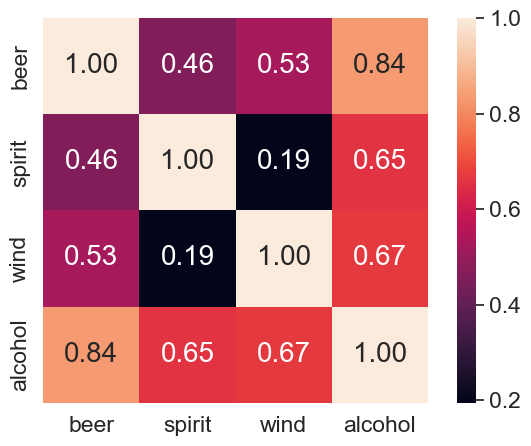

In [108]:
## 상관관계 시각화
cols_view = ['beer','spirit','wind','alcohol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(
    corr.values,
    cbar=True,  # color bar 표시 여부 
    annot=True, # annotation(수치) 표시 여부
    square=True,
    fmt='.2f',
    annot_kws= {'size':20},
    xticklabels= cols_view,
    yticklabels= cols_view
)

plt.tight_layout()
plt.show()

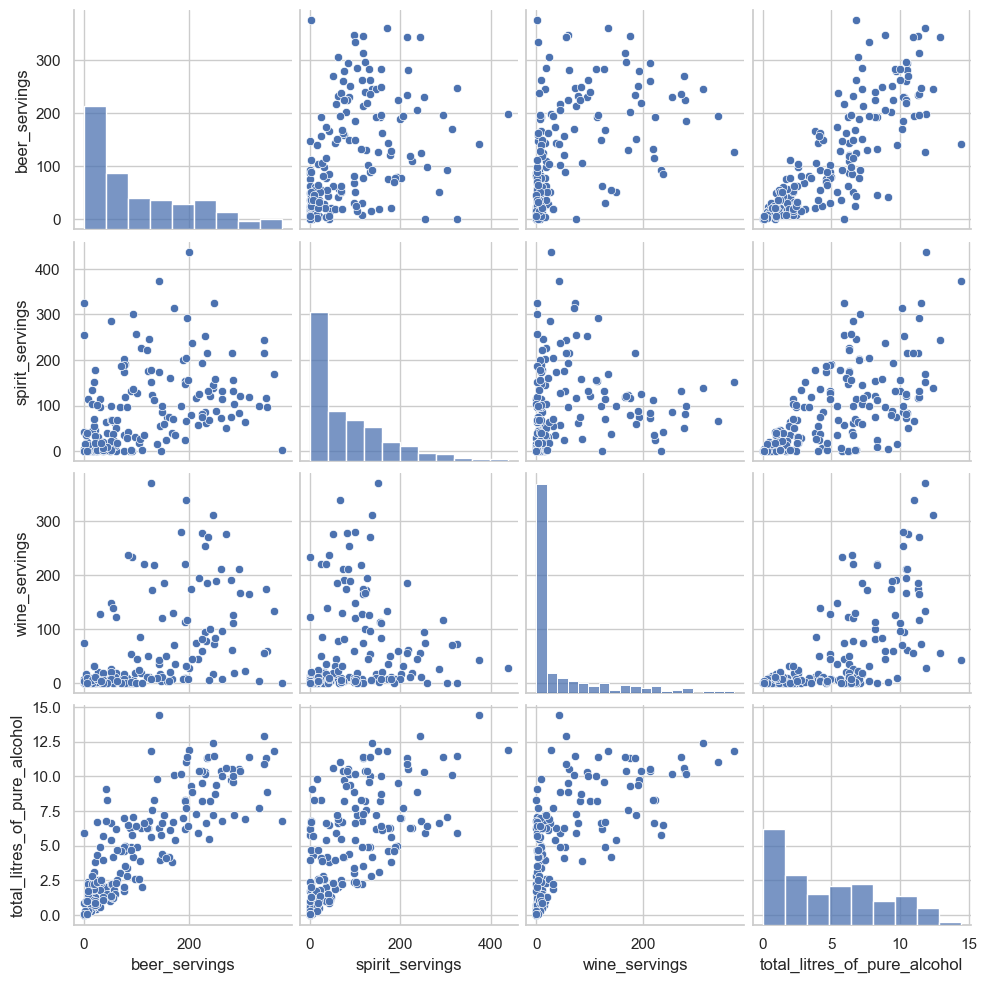

In [109]:
sns.set(style='whitegrid',context='notebook')

sns.pairplot(
    drinks[
        ['beer_servings',
         'spirit_servings',
         'wine_servings',
         'total_litres_of_pure_alcohol']
    ],
    height = 2.5
)

plt.show()

In [110]:
## 새로운 파생변수를 생성
## 총 술의 소비량(total_servings) = beer + spirit + wine

# 술 소비량 대비 알콜 비율 파생변수 생성
# alcohol_rate = total_litres_of_pure_alcohol / total_servings
# 결측치 존재 -> 0으로 대체

In [111]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [112]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings']+ drinks['wine_servings']

In [113]:
drinks['alcohol_rate']= drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']

In [114]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495


In [115]:
drinks.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
total_servings                   0
alcohol_rate                    13
dtype: int64

In [116]:
drinks= drinks.fillna(0)

In [117]:
drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
total_servings                  0
alcohol_rate                    0
dtype: int64

In [122]:
drinks_rank = drinks.sort_values(['alcohol_rate'],ascending= False)

In [124]:
drinks_rank.reset_index(drop=True,inplace=True)

In [120]:
# drinks_rank = drinks.sort_values(['alcohol_rate'],ascending= False).reset_index(drop=True,inplace=True)

In [130]:
drinks_rank[drinks_rank['country'] == 'South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
14,South Korea,140,16,9,9.8,AS,165,0.059394


In [127]:
# 한국의 Alcolho rate 순위
drinks_rank[drinks_rank['country'] == 'South Korea'].index + 1

Int64Index([15], dtype='int64')

In [129]:
drinks_rank.loc[drinks_rank['country'] == 'South Korea'].index + 1

Int64Index([15], dtype='int64')

In [131]:
# for key, value in drinks_rank['country']:
    # if value == "South Korea":
     #   print(key)

ValueError: too many values to unpack (expected 2)

In [162]:
drinks_rank['country']


0            Gambia
1      Sierra Leone
2           Nigeria
3            Uganda
4            Rwanda
           ...     
188        Maldives
189           Libya
190            Iran
191          Kuwait
192     Afghanistan
Name: country, Length: 193, dtype: object

0.0593939393939394


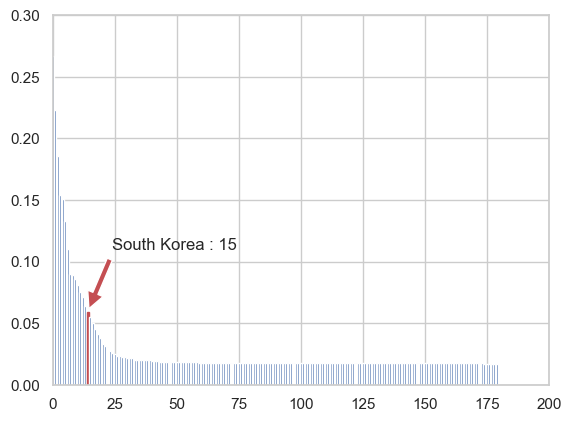

In [156]:
# 데이터의 시각화
x = drinks_rank.index
y = drinks_rank['alcohol_rate']

# 국가리스트
country_list = drinks_rank['country'].to_list() # 시리즈를 리스트로 변환
bar_list = plt.bar(x,y)

# 그래픽 커스텀
# 한국의 그래프만 빨간색으로 변경
bar_list[country_list.index('South Korea')].set_color('r')  

# 그래프의 x축의 범위, y축의 범위 지정
plt.axis([0,200,0,0.3])

korea_rank = country_list.index('South Korea') 
korea_alcohol_rate = drinks_rank[drinks_rank['country'] == 'South Korea']\
                     ['alcohol_rate'].values[0]  # korea 알콜수치 
print(korea_alcohol_rate)

plt.annotate(
    'South Korea : ' + str(korea_rank + 1),   # 텍스트 문구
    xy = (korea_rank, korea_alcohol_rate),    # x, y 좌표
    xytext = (korea_rank+10, korea_alcohol_rate+0.05), # 텍스트 표시 위치
    arrowprops=dict(
        facecolor = 'r',  # 화살표 색깔
        shrink = 0.05     # 화살표 길이
    )
)

plt.show()